# Demonstrating the leaky eigenvalue problem 

In [1]:
import numpy as np 
from scipy import sparse 
import graph_tool.all as gt
import pandas as pd
from scipy import sparse, stats
from scipy.sparse.csgraph import connected_components
import matplotlib.pyplot as plt 
import seaborn as sns  

### Generate a network

In [2]:
# Generating the stocahstic block model 
def generate_network(Cave, mixing_rate, N, q):

    memberships = np.sort(np.arange(N) % q)

    q = int(np.max(memberships) + 1)
    N = len(memberships)
    U = sparse.csr_matrix((np.ones(N), (np.arange(N), memberships)), shape=(N, q))

    Cout = np.maximum(1, mixing_rate * Cave)
    Cin = q * Cave - (q - 1) * Cout
    pout = Cout / N
    pin = Cin / N

    Nk = np.array(U.sum(axis=0)).reshape(-1)

    P = np.ones((q, q)) * pout + np.eye(q) * (pin - pout)
    probs = np.diag(Nk) @ P @ np.diag(Nk)
    gt_params = {
        "b": memberships,
        "probs": probs,
        "micro_degs": False,
        "in_degs": np.ones_like(memberships) * Cave,
        "out_degs": np.ones_like(memberships) * Cave,
    }

    # Generate the network until the degree sequence
    # satisfied the thresholds
    while True:
        g = gt.generate_sbm(**gt_params)

        A = gt.adjacency(g).T

        A.data = np.ones_like(A.data)
        # check if the graph is connected
        if connected_components(A)[0] == 1:
            break
        break
    return A, memberships

N = 10000
q = 2
mixing_rate = 0.2
net_list = {}
for cave in [5, 50]:
    A, membership = generate_network(cave, mixing_rate, N, q)
    net_list[cave] = {"A":A, "membership":membership}

### Calculate the eigenvalues 

In [3]:
from tqdm.auto import tqdm 

eigenvals_list = {}
for cave, net in tqdm(net_list.items()):
    A = net["A"]
    #eigenvals, eigenvec = sparse.linalg.eigsh(A, k = n_eigenvals)
    eigenvals = np.linalg.eigvalsh(A.toarray())
    eigenvals_list[cave] = np.real(eigenvals)
    #eigenvec_list[cave] = np.real(eigenvec)

  0%|          | 0/2 [00:00<?, ?it/s]

# Plot the eigenvalue distribution 

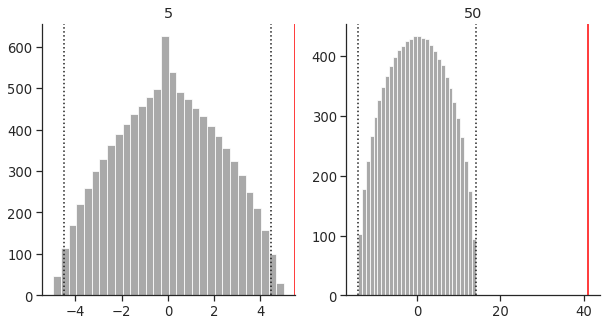

In [ ]:
# %%
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score

sns.set_style('white')
sns.set(font_scale=1.2)
sns.set_style('ticks')
fig, axes = plt.subplots(figsize=(10,5), ncols = 2)

for i, (cave, eigenvals) in enumerate(eigenvals_list.items()):

    threshold = 2 * np.sqrt(cave)

    #emb = eigenvec_list[cave]
    #order = np.argsort(eigenvals)
    #kmeans = KMeans(n_clusters=2, random_state=0).fit(emb[:, order[-2]].reshape((-1, 1)))
    #score = normalized_mutual_info_score(kmeans.labels_, membership) 

    order = np.argsort(np.abs(eigenvals))
    x = eigenvals[order[:-2]]

    ax = sns.histplot(x, ax = axes[i], bins = 30, color = "#8d8d8d")
    
    ax.axvline(eigenvals[order[-2]], color = "red")
    
    ax.axvline(threshold, ls = ":", color = "k")
    ax.axvline(-threshold, ls = ":", color = "k")
    ax.set_ylabel("")
    ax.set_title(cave)
sns.despine() 
fig.savefig("demo_leaky_eigenvalue_problem.pdf", bbox_inches='tight', dpi=300)

In [98]:
 1 - 1/np.sqrt(5)

0.5527864045000421

In [ ]:
emb = np.einsum("ij,i->ij", emb, 1 / np.linalg.norm(emb, axis=1))